# Principal Component Regression
Author: Deep Contractor

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
data = pd.read_csv("Bodyfat.csv")

In [4]:
data.head()

,Density,bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [5]:
data.shape

(252, 15)

In [6]:
data_x = data.iloc[:,2:15]
data_y = data.iloc[:,1]

In [7]:
data_x.head()

,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [8]:
data_y.head()

0    12.3
1     6.1
2    25.3
3    10.4
4    28.7
Name: bodyfat, dtype: float64

In [9]:
import sklearn
from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [10]:
#scaling my data first so that it becomes unitless
scaler=StandardScaler()
scaler.fit(data_x)
scaled_data_x = scaler.transform(data_x)

In [11]:
scaled_data_x

array([[-1.74007329, -0.84124583, -0.65620473, ..., -0.09067593,
        -0.62671828, -1.2125412 ],
       [-1.81958344, -0.19346239,  0.57478975, ..., -0.58814329,
         0.11707924, -0.0319426 ],
       [-1.81958344, -0.84976929, -1.06653622, ..., -1.15193963,
        -1.71762131, -1.74917692],
       ...,
       [ 2.15592399,  0.26680479, -1.1349248 , ..., -0.32282736,
        -0.72589128, -0.24659689],
       [ 2.15592399,  0.40318025,  0.09606967, ..., -0.58814329,
         0.36501175,  1.68529172],
       [ 2.31494429,  0.97425249, -0.04070749, ...,  0.47312041,
         0.66253075,  2.86589032]])

In [12]:
scaled_data_x.shape

(252, 13)

In [13]:
pca = PCA()
pca.fit(scaled_data_x)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [14]:
data_x_pca = pca.transform(scaled_data_x)
pca.explained_variance_ratio_


array([0.6184759 , 0.1042366 , 0.0771014 , 0.05134564, 0.04606253,
       0.02413494, 0.02201289, 0.02006958, 0.01407548, 0.01031945,
       0.00596853, 0.00438128, 0.00181577])

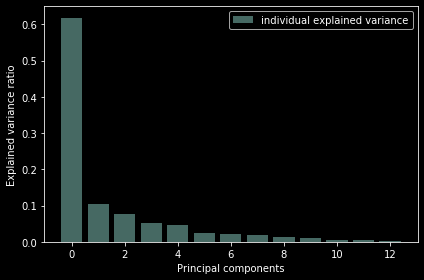

In [15]:
explained_variance=pca.explained_variance_ratio_
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(13), explained_variance, alpha=0.5, align='center',label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [16]:
data_x_pca.shape

(252, 13)

In [17]:
0.6184759 + 0.1042366 + 0.0771014 + 0.05134564+ 0.04606253

0.89722207

In [18]:
pca.explained_variance_ratio_.sum()

1.0

In [19]:
data_x_pca

array([[-2.22405399, -1.23907275,  1.49921444, ..., -0.1534585 ,
         0.36501388,  0.03712057],
       [-0.88791171, -2.01371722,  0.03786291, ...,  0.22070776,
        -0.0299183 , -0.03916811],
       [-2.36578013, -1.22240161,  2.19792678, ..., -0.11452892,
         0.15321628,  0.29115987],
       ...,
       [ 0.452017  ,  3.21209938,  0.47292409, ..., -0.33454743,
         0.26314467, -0.04570494],
       [ 1.23711131,  2.18713199, -1.81492442, ..., -0.20469357,
         0.18825164, -0.16599395],
       [ 3.70005006,  2.37511881, -1.80242278, ...,  0.23421231,
         0.12704643,  0.18602569]])

In [20]:
pca_df = pd.DataFrame(data_x_pca)
pca_df.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000e+00,-4.486843e-15,-3.240442e-16,2.244064e-16,1.766907e-16,2.658728e-16,2.323573e-16,-4.781766e-16,-1.961404e-16,6.753357e-16,1.098290e-15,5.943953e-16,-4.334374e-15
1,-4.486843e-15,1.000000e+00,-3.084717e-16,1.116404e-16,-8.510040e-17,6.709379e-16,-1.061229e-16,4.297492e-17,-1.592565e-16,-2.479929e-17,-8.695658e-17,-5.375954e-16,-4.618775e-16
2,-3.240442e-16,-3.084717e-16,1.000000e+00,2.456113e-16,-2.047217e-16,3.853953e-16,-6.416398e-17,-3.601159e-16,2.345516e-16,8.650465e-17,1.500808e-16,-9.025838e-16,-1.473635e-15
3,2.244064e-16,1.116404e-16,2.456113e-16,1.000000e+00,9.163606e-17,-7.205215e-17,-7.862680e-17,6.862127e-17,-2.719779e-16,-1.987559e-17,1.289787e-16,2.917592e-16,4.606628e-17
4,1.766907e-16,-8.510040e-17,-2.047217e-16,9.163606e-17,1.000000e+00,-5.127475e-16,-1.926338e-16,4.458444e-18,1.131305e-17,3.000002e-16,1.435837e-16,-2.257345e-16,-2.760693e-16
5,2.658728e-16,6.709379e-16,3.853953e-16,-7.205215e-17,-5.127475e-16,1.000000e+00,6.478490e-17,-8.113003e-17,-1.540775e-16,1.210434e-16,5.128879e-16,6.015873e-16,-3.660316e-16
6,2.323573e-16,-1.061229e-16,-6.416398e-17,-7.862680e-17,-1.926338e-16,6.478490e-17,1.000000e+00,9.591855e-15,-2.146698e-16,-1.675158e-16,-1.278734e-16,1.945423e-16,6.566489e-16
7,-4.781766e-16,4.297492e-17,-3.601159e-16,6.862127e-17,4.458444e-18,-8.113003e-17,9.591855e-15,1.000000e+00,4.567029e-16,-1.589544e-16,-2.012690e-16,-2.195549e-16,-1.009103e-15
8,-1.961404e-16,-1.592565e-16,2.345516e-16,-2.719779e-16,1.131305e-17,-1.540775e-16,-2.146698e-16,4.567029e-16,1.000000e+00,1.026359e-16,-2.209219e-16,-5.669530e-16,-1.357466e-16
9,6.753357e-16,-2.479929e-17,8.650465e-17,-1.987559e-17,3.000002e-16,1.210434e-16,-1.675158e-16,-1.589544e-16,1.026359e-16,1.000000e+00,2.434394e-16,-2.768896e-16,1.214477e-15


Text(0.5, 1, 'Correlation between different fearures')

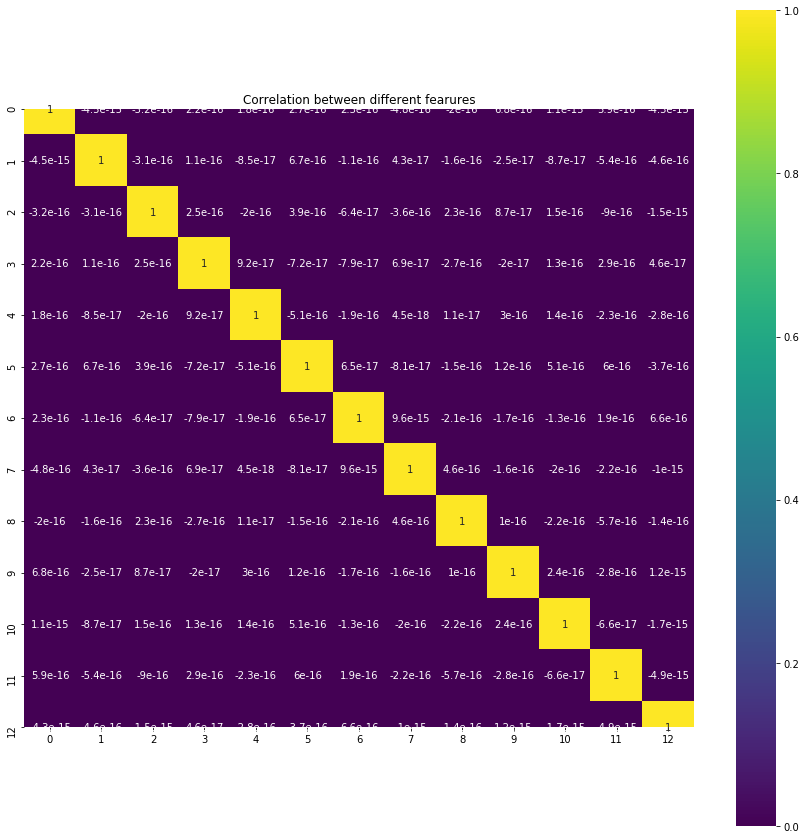

In [21]:

correlation = pca_df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')
plt.title('Correlation between different fearures')

In [22]:
from sklearn import linear_model
lcn_model = linear_model.LinearRegression()

In [23]:
pca_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-2.224054,-1.239073,1.499214,-0.285168,-0.163375,0.236046,-0.226479,0.263392,-0.076203,-0.292361,-0.153459,0.365014,0.037121
1,-0.887912,-2.013717,0.037863,-0.228428,0.168634,0.746895,-0.049603,-0.610454,-0.192390,0.164927,0.220708,-0.029918,-0.039168
2,-2.365780,-1.222402,2.197927,1.918012,0.181308,-0.264787,0.166518,-0.129322,0.073317,-0.439153,-0.114529,0.153216,0.291160
3,-0.116070,-1.551725,0.311106,-0.513833,-0.294859,0.343433,0.246967,-0.216478,0.514082,0.039320,0.010698,-0.407625,-0.058998
4,0.322235,-1.690589,1.215897,1.409837,-0.314117,-1.196785,-0.416036,-0.036395,0.510426,-0.462736,-0.103085,0.889426,-0.049696


In [32]:
lcn_model.fit(pca_df.iloc[:,[0,1,2,3,4,5,6,7]],data_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
lcn_model.score(pca_df.iloc[:,[0,1,2,3,4,5,6,7]],data_y)

0.6741254499171134